<a href="https://colab.research.google.com/github/vCillusion/Social-Defender/blob/master/Code/Social_Defender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Defender
Social Defender is an idea to use the machine algorithm to perform sentiment analysis and create a positive outlook for the users, by using customized views and tagging content. 

## Hinglish Sentiment Analysis
The first target of the application is to learn and perform sentiment analysis model to categorize Hinglish data. 

### Analyzing the Dataset
The dataset is loaded using the Pandas library.

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Comments Text     126 non-null object
Feelings Text     126 non-null object
Emotions Text     126 non-null object
Context Text      126 non-null object
Feelings Value    126 non-null int64
Emotions Value    126 non-null int64
Context Value     126 non-null int64
dtypes: int64(3), object(4)
memory usage: 7.0+ KB
None
(126, 7)
Head and Tail of data
                                    Comments Text Feelings Text Emotions Text  \
0                                           🦋🦋🦋❤️      Positive        Loving   
1  Pdhane do didi ! 😫 Semester exam chl rhe hai !      Negative       Sarcasm   
2                               @dishapatani 🔥🔥🔥👈      Positive    Compliment   
3           @dishapatani u are always fabulous ❤️      Positive    Compliment   
4           @dishapatani mbd radisson blu delhi..       Neutral   Information   

  Context Text  Feelings Value  Emotions V

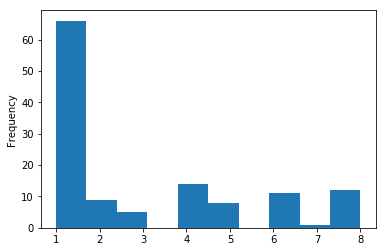

In [0]:
import pandas as pd
import io
df = pd.read_csv('https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Emotions/Emotions_Data.csv')
print('Basic Information')
print(df.info())
print(df.shape)
print('Head and Tail of data')
print(df.head())
print(df.tail())
# Plot to get a gist of frequency and type of values
df['Emotions Value'].plot(kind='hist')

### Processing the data
We wanted to clean the data for accurate results. We replace the abbreviations using our slang translator and then remove the stop words (most common words to understand the context better).

In [0]:
# Utility methods to handle files from the github
def loadFileFromUrl ( url, filename, override = True ) :
  exists = os.path.isfile(filename)
  if not exists or override:
    # raw=true is important so you download the file rather than the webpage.
    !wget $url
    # rename the file
    !mv $filename\?raw\=true $filename
  return filename

def getFile ( filename ) :
  file = open(filename, 'r')
  return file

def readFile ( filename ) :
  return getFile(filename).read()

def getFileFromUrl ( url, filename, override = True ) :
  return getFile(loadFileFromUrl(url, filename, override ))

def readFileFromUrl ( url, filename, override = True ) :
  return readFile(loadFileFromUrl(url, filename, override))

def readFileFromUrlSplit ( url, filename, override = True ) :
  return readFileFromUrl(url, filename, override).splitlines()


#### Design the slang translator
The plan is to make the text more readable by expanding the abbreviations by using similar logic mentioned in the [blog post](https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222).

In [0]:
import os
import re
def initMap(fileUrl, fileName, delimiter, override):
  exists = os.path.isfile(fileName)
  inputFile = getFileFromUrl (fileUrl, fileName, override)
  resultMap = {}
  for line in inputFile:
    (key, val) = line.split('=')
    resultMap[key.lower()] = val.strip()
    # print(resultMap)
  resultMap['u'] = 'you'
  return resultMap

def translator(input):
  # Load File path which consists of Abbreviations
  fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Abbreviations/slang.txt?raw=true'
  fileName = 'slang.txt'
  delimiter = '='
  abbreviations_slang = initMap(fileUrl, fileName, delimiter, True)
  print(abbreviations_slang)

  # Loop over words and replace slangs
  words = input.split(' ')
  for index in range(len(words)):
    # Removing Special Characters.
    word = re.sub('[^a-zA-Z0-9-_.]','', words[index]).lower()
    if word in abbreviations_slang:
      words[index] = abbreviations_slang[word]
  
  # Create output
  output = ' '.join(words)
  return output
  
# translator('brb pal')

Translate slangs and abbreviations into meaningful words
--2019-05-04 17:26:14--  https://github.com/vCillusion/Social-Defender/blob/master/Data/Abbreviations/slang.txt?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vCillusion/Social-Defender/raw/master/Data/Abbreviations/slang.txt [following]
--2019-05-04 17:26:14--  https://github.com/vCillusion/Social-Defender/raw/master/Data/Abbreviations/slang.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Abbreviations/slang.txt [following]
--2019-05-04 17:26:14--  https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Abbreviations/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.6

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyError: ignored

#### Apply the slang translator

In [0]:

short_data = df.head()
print('Translate slangs and abbreviations into meaningful words')
print(short_data['Comments Text'])
short_data.loc[:, 'Comments Text'].apply(translator)
print(short_data['Comments Text'])

Translate slangs and abbreviations into meaningful words
@dishapatani you are always fabulous ❤️
--2019-05-04 18:07:03--  https://github.com/vCillusion/Social-Defender/blob/master/Data/Abbreviations/slang.txt?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vCillusion/Social-Defender/raw/master/Data/Abbreviations/slang.txt [following]
--2019-05-04 18:07:04--  https://github.com/vCillusion/Social-Defender/raw/master/Data/Abbreviations/slang.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Abbreviations/slang.txt [following]
--2019-05-04 18:07:04--  https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Abbreviations/slang.txt
Resolving raw.githubusercontent.com (raw.githubuser

#### English Stop words using nltk

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_english = stopwords.words("english")
print(stop_english)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

#### Hindi Stop words using [Hinglish NLP](https://github.com/TrigonaMinima/HinglishNLP)

In [0]:
# Load Hindi Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hindi.txt?raw=true'
fileName = 'stop_hindi.txt'
stop_hindi = readFileFromUrlSplit (fileUrl, fileName)
# print(stop_hindi)

# Load Hinglish Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hinglish.txt?raw=true'
fileName = 'stop_hinglish.txt'
stop_hinglish = readFileFromUrlSplit (fileUrl, fileName)
# print(stop_hinglish)

# Load Shorthands Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_shorthands.txt?raw=true'
fileName = 'stop_shorthands.txt'
stop_shorthands = readFileFromUrlSplit (fileUrl, fileName)
# print(stop_shorthands)

--2019-05-04 18:10:09--  https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hindi.txt?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vCillusion/Social-Defender/raw/master/Data/Stop%20Words/stop_hindi.txt [following]
--2019-05-04 18:10:09--  https://github.com/vCillusion/Social-Defender/raw/master/Data/Stop%20Words/stop_hindi.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Stop%20Words/stop_hindi.txt [following]
--2019-05-04 18:10:09--  https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Stop%20Words/stop_hindi.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connectin

#### Using the stop words

In [0]:
stop = []
stop.extend(stop_hindi)
stop.extend(stop_english)
stop.extend(stop_hinglish)
stop.extend(stop_shorthands)
print('Remove Stop words')
short_data.loc[:, 'Comments Text'].apply(
    lambda comment: ' '.join([word for word in comment.split() 
                              if word not in 
                              (stop)]))
print(short_data['Comments Text'])


Remove Stop words
0                                    🦋🦋🦋❤️
1      Pdhane didi ! 😫 Semester exam chl !
2                        @dishapatani 🔥🔥🔥👈
3                 @dishapatani fabulous ❤️
4    @dishapatani mbd radisson blu delhi..
Name: Comments Text, dtype: object


#### Identify english words from non english words
We need to identify english words from hindi related words to apply appropriate algorithms.

In [27]:
# import dependencies
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import words

# initialize dictionaries
wordset = set(words.words())

# create a method to identify english words
def isEnglish(input):
  return input in wordset or wordnet.synsets(input)

# Test inputs
word_to_test = 'npr'

# validate words
if isEnglish(word_to_test):
  #English Word
  print('english')
else:
  #Not an English Word
  print('non english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
non english


#### Remove the accents

In [0]:
# Remove accents function, example á
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

print('Remove Accents')
print(short_data['Comments Text'])
short_data.loc[:, 'Comments Text'].apply(remove_accents)
print(short_data['Comments Text'])

#### Using the Stemming

#### Hindi Stemmer logic
Trying to shorten a word with simple regex rules. Example: to use the technique to common out words like ladke, ladki, ladkon, ladkiyon to ladk, etc

In [30]:
# Logic for hindi stemmer
import re

regex = r"(.{2,}?)(((?<=[^aeiou])((t)(?=a)|(?=e))*(?<=[^aeiou])((on))*(?<=[^aeiou])((on))*(?<=[^aeiou])((en))*(?<=[^aeiou])((en))*$)|((yeng[eaing]*)*(y[aone]*)*([ue]ng[eian]*)*(y[oea][gain]*)*(ega)*(og[aeiou])*(ian)*(ion)*(se)*(iye)*(ein)*(o)*(a)*(e)*(i)*([aeio]*)*$))"

test_str = ("dikhayega\n"
	"aaega\n"
	"dekhega\n"
	"panga\n"
	"aayoge\n"
	"aaoge\n"
	"karoge\n"
	"rahogi\n"
	"bharogi\n"
	"karogi\n"
	"batayegi\n"
	"batayeingi\n"
	"aaungan\n"
	"aaunga\n"
	"maangega\n"
	"nindion\n"
	"tumse\n"
	"tujhse\n"
	"betaabion\n"
	"aaiye\n"
	"nanaken\n"
	"ladken\n"
	"chheen\n"
	"paayega\n"
	"aayega\n"
	"khayega\n"
	"jaayega\n"
	"laakhon\n"
	"laakhoon\n"
	"khoon\n"
	"nakhoon\n"
	"ladkon\n"
	"ate\n"
	"lte\n"
	"chalte\n"
	"raate\n"
	"raaste\n"
	"maarte\n"
	"ladkon\n"
	"maarta\n"
	"raatein\n"
	"raatein\n"
	"chaltein\n"
	"khoon\n"
	"baatooni\n"
	"banyaan\n"
	"banyan\n"
	"banian\n"
	"phode\n"
	"guthiyan\n"
	"dikhayenge\n"
	"bahayein\n"
	"aayengai\n"
	"batayein\n"
	"aayega\n"
	"bheega\n"
	"megha\n"
	"betaabiyon\n"
	"betaabiyan\n"
	"betaabiyo\n"
	"punga\n"
	"panga\n"
	"danga\n"
	"pange\n"
	"chalunga\n"
	"chalungi\n"
	"chalenge\n"
	"chalein\n"
	"dungi\n"
	"batayein\n"
	"duniya\n"
	"dunia\n"
	"peetalon\n"
	"suniyo\n"
	"soniyo\n"
	"sonio\n"
	"ouy\n"
	"aayengai\n"
	"aayengi\n"
	"aayengin\n"
	"aayenge\n"
	"aayengen\n"
	"aayengein\n\n"
	"aayengi\n"
	"aayenge\n"
	"aayengein\n"
	"aaunga\n"
	"aaungi\n"
	"lega\n"
	"leja\n"
	"Dosti\n"
	"Doston\n"
	"Boliye\n"
	"baliye\n"
	"balkha\n"
	"padharengi\n"
	"Bolungi\n"
	"Bolenge\n"
	"Bola\n"
	"Jana\n"
	"Jaenge\n"
	"deja\n"
	"hawayein\n"
	"aayenga\n"
	"maangenga\n"
	"sambhal\n"
	"lega\n"
	"latein\n"
	"vaduein\n"
	"chabiyan\n"
	"sakhian\n"
	"dega\n"
	"pyaara\n"
	"ladkiyon\n"
	"ladke\n"
	"ladka\n"
	"paani\n"
	"parnani\n"
	"ladkea\n"
	"aapki\n"
	"khatir\n"
	"mere\n"
	"mera\n"
	"maine\n"
	"main\n"
	"dil\n"
	"dilon\n"
	"dilwalon\n"
	"ka\n"
	"jahan\n"
	"hai\n"
	"hazir\n"
	"apne\n"
	"sare\n"
	"armaanon\n"
	"karo\n"
	"pyaar\n"
	"pyaare\n"
	"loon\n"
	"main\n"
	"jahir\n"
	"aap\n"
	"Tu\n"
	"kitana\n"
	"kamyaab\n"
	"tu\n"
	"chadata\n"
	"aastabh\n"
	"Tu\n"
	"note\n"
	"gin\n"
	"janaab\n"
	"mera\n"
	"khun\n"
	"tera\n"
	"khwab\n"
	"Saare\n"
	"mere\n"
	"ka\n"
	"saare\n"
	"mere\n"
	"nindon\n"
	"ka\n"
	"ab\n"
	"tu\n"
	"hi\n"
	"de\n"
	"hisaab\n"
	"Tu\n"
	"kitana\n"
	"kamyaab\n"
	"tu\n"
	"chadata\n"
	"aastabh\n"
	"Raaton\n"
	"jaag\n"
	"ke\n"
	"mehanat\n"
	"ki\n"
	"jo\n"
	"hota\n"
	"hain\n"
	"hone\n"
	"do\n"
	"Teri\n"
	"mummy\n"
	"pyaar\n"
	"se\n"
	"gharoon\n"
	"junoon\n"
	"dega\n"
	"daket\n"
	"khet\n"
	"aankein\n"
	"ankhiyon\n"
	"sathiyon\n"
	"gatiyon\n"
	"aankhe\n"
	"pustakein\n"
	"banhein\n"
	"nitiyan\n"
	"kehati\n"
	"nitiya\n"
	"gatiyan\n"
	"thi\n"
	"Bitawan\n"
	"ko\n"
	"aur\n"
	"papon\n"
	"sone\n"
	"nindiya\n"
	"do\n"
	"Tution\n"
	"car\n"
	"me\n"
	"Ac\n"
	"ghar\n"
	"me\n"
	"Munna\n"
	"bas\n"
	"tu\n"
	"baal\n"
	"banna\n"
	"banno\n"
	"tera\n"
	"sweater\n"
	"lage\n"
	"sexy\n"
	"Yeh\n"
	"Yehi\n"
	"kahi\n"
	"pani\n"
	"paani\n"
	"galiyan\n"
	"galiya\n"
	"gali\n"
	"nana\n"
	"nani\n"
	"nanakein\n"
	"puraani\n"
	"purani\n"
	"yo\n"
	"zindagani\n"
	"meherbaani\n"
	"meherbaaniyan\n"
	"kaha\n"
	"to\n"
	"na\n"
	"ho\n"
	"tu\n"
	"aankhon\n"
	"ka\n"
	"chiraag\n"
	"Tu\n"
	"maine\n"
	"hain\n"
	"kaafi\n"
	"hain\n"
	"nawaab\n"
	"Saare\n"
	"mere\n"
	"ghire\n"
	"ghira\n"
	"nindon\n"
	"ka\n"
	"Ab\n"
	"hu\n"
	"hi\n"
	"de\n"
	"hisaab\n")

matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    
    for groupNum in range(0, min(len(match.groups()), 1)):
        groupNum = groupNum + 1
        
        print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))



Match 1 was found at 0-9: dikhayega
Group 1 found at 0-5: dikha
Match 2 was found at 10-15: aaega
Group 1 found at 10-12: aa
Match 3 was found at 16-23: dekhega
Group 1 found at 16-20: dekh
Match 4 was found at 24-29: panga
Group 1 found at 24-28: pang
Match 5 was found at 30-36: aayoge
Group 1 found at 30-32: aa
Match 6 was found at 37-42: aaoge
Group 1 found at 37-39: aa
Match 7 was found at 43-49: karoge
Group 1 found at 43-46: kar
Match 8 was found at 50-56: rahogi
Group 1 found at 50-53: rah
Match 9 was found at 57-64: bharogi
Group 1 found at 57-61: bhar
Match 10 was found at 65-71: karogi
Group 1 found at 65-68: kar
Match 11 was found at 72-80: batayegi
Group 1 found at 72-76: bata
Match 12 was found at 81-91: batayeingi
Group 1 found at 81-85: bata
Match 13 was found at 92-99: aaungan
Group 1 found at 92-94: aa
Match 14 was found at 100-106: aaunga
Group 1 found at 100-102: aa
Match 15 was found at 107-115: maangega
Group 1 found at 107-112: maang
Match 16 was found at 116-123: